# Probabilidad de Default
- La probabilidad de que una persona no termine pagando su prestamo es la probabilidad de Default
- Los valores que toma ```loan_status```
    - 0 si el cliente pago su prestamo
    - 1 si el cliente no pagó su prestamo
    
Los algoritmos de clasificación que se probaran para este dataset serán 
- Regresion Logisticas
- Arbol de Decicion

## Regresion Logistica
Para la regresion logistica tomamos todos los valores como un vector $X$, los multiplicamos por una serie de pesos $W$ y les aplicamos una funcion sigmoide
$$ f(X) = Y = X * W$$
$$ g(X) = \frac{1}{1+ e^{-Y}}$$

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, classification_report, precision_recall_fscore_support, roc_auc_score
import matplotlib.pyplot as plt
import matplotlib
cr_loan_clean = pd.read_csv("data/cr_loan_nout_nmiss.csv")

In [2]:
# Utilizando solamente el interes del prestamo como parametro
cr_loan_clean.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,21,9600,OWN,5,EDUCATION,B,1000,11.14,0,0.10,N,2
1,25,9600,MORTGAGE,1,MEDICAL,C,5500,12.87,1,0.57,N,3
2,23,65500,RENT,4,MEDICAL,C,35000,15.23,1,0.53,N,2
3,24,54400,RENT,8,MEDICAL,C,35000,14.27,1,0.55,Y,4
4,21,9900,OWN,2,VENTURE,A,2500,7.14,1,0.25,N,2


In [3]:
# LogisticRegression??

In [4]:
# clf_logistic_single.intercept_??

In [5]:
# Separar los features de la variable a predecir
X = cr_loan_clean[['loan_int_rate']]
y = cr_loan_clean[['loan_status']]

# Entrenar el modelo
clf_logistic_single = LogisticRegression(solver='lbfgs')
clf_logistic_single.fit(X, np.ravel(y))

# Parametros del modelo
print(clf_logistic_single.get_params())

print(clf_logistic_single.intercept_)

{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-4.45785901]


In [6]:
# Regresion logisitica con multiples features
X_multi = cr_loan_clean[['loan_int_rate','person_emp_length']]

# Variable a predecir
y = cr_loan_clean[['loan_status']]

# Creacion y entrenamiento de la regresion logistica
clf_logistic_multi = LogisticRegression(solver='lbfgs').fit(X_multi, np.ravel(y))

# Intercept
print(clf_logistic_multi.intercept_)

[-4.21645549]


El valor de intercept_ se hacerca a cero. Esto significa que las probabilidades de un registro con un valor no predeterminado se acercan a cero.

In [7]:
# Se crean los datasets
X = cr_loan_clean[['loan_int_rate','person_emp_length','person_income']]
y = cr_loan_clean[['loan_status']]

# Se divide el dataset en conjuntos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

# Creacion y entrenamiento del modelo de regresion
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Impresion de los coeficientes de los modelos
print(clf_logistic.coef_)

[[ 1.28517496e-09 -2.27622202e-09 -2.17211991e-05]]


Los coeficientes indican si la correlacion es positiva o negativa con respecto a la variable que buscamos predecir

### Manejo de Variables Categóricas
Para manejar las variables categoricas utilizamos lo que se llama ```one hot encoding```

In [8]:
# Creacion de dos datasets, uno con features numericos 
# y otro con features categoricos
cred_num = cr_loan_clean.select_dtypes(exclude=['object'])
cred_str = cr_loan_clean.select_dtypes(include=['object'])

In [9]:
cred_str.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
0,OWN,EDUCATION,B,N
1,MORTGAGE,MEDICAL,C,N
2,RENT,MEDICAL,C,N
3,RENT,MEDICAL,C,Y
4,OWN,VENTURE,A,N


In [10]:
# One-hot encode de las columnas no numericas
cred_str_onehot = pd.get_dummies(cred_str)

In [11]:
cred_str_onehot.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


In [12]:
# Union entre el dataset con el one-hot-encoding y el dataset con features numericos
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)
print(cr_loan_prep.columns, len(cr_loan_prep.columns))

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object') 27


In [13]:
# Separacion de los features y la variable a predecir
columns = list(cr_loan_prep.columns)
X_columns = [column for column in columns if column != 'loan_status']
X = cr_loan_prep[X_columns]
y = cr_loan_prep[['loan_status']]

# Creacion del dataset de entrenamiento y de testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=123)

In [14]:
# Train the logistic regression model on the training data
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

# Create predictions of probability for loan status using test data
pred = clf_logistic.predict_proba(X_test)

# Create dataframes of first five predictions, and first five true labels
preds_df = pd.DataFrame(pred[:,1][0:5], columns = ['prob_default'])
true_df = y_test.head()

# Concatenate and print the two data frames for comparison
# print(pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1))
comparison = pd.concat([true_df.reset_index(drop = True), preds_df], axis = 1)
comparison.head()

,loan_status,prob_default
0,1,0.445779
1,1,0.223447
2,0,0.288558
3,0,0.169358
4,1,0.114182


### Medir el performance de la Regresion Logistica
Una buena manera de medir el ```performance``` del modelo es usando ```accuracy``` que concieste en:

$$accuracy = \frac{Numero\,de\,predicciones\,correctas}{Numero\,de\,predicciones}$$

In [15]:
clf_logistic.score(X_test, y_test)

0.8025288526816021

In [16]:
prob_default = pd.DataFrame(pred[:,1], columns=['prod_default'])

Otra manera de evaluar el performance de un modelo es utilizando una ```Curva ROV```

```specificity``` o ```fallout``` es el ```false positive rate```, mientras que ```sensitivity``` es el ```true positive rate```

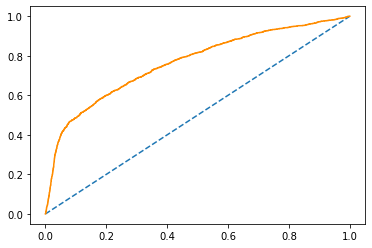

In [17]:
specificity, sensitivity, threshold = roc_curve(y_test, prob_default)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(specificity, sensitivity, color='darkorange')

In [18]:
auc = roc_auc_score(y_test, prob_default)
print(auc)

0.7643248801355148


Como el modelo en lugar de retornar 1s y 0s retorna una probabilidad al clasificar los registros, podemos definir un umbral o ```threshold``` de acuerdo a lo que creamos que debemos considerar como un ```Default``` o no. Para esto definamos ahora la siguiente condicion en base a las probabilidades que obtenemos

$$
\begin{equation}
Probabilidad\>de\>Default =
\begin{cases}
probabilidad\>predicha <= 0.5, & 0\>\>(No\>Default) \\
probabilidad\>predicha > 0.5, & 1\>\>(Default)
\end{cases}
\end{equation}
$$

In [19]:
preds = clf_logistic.predict_proba(X_test)
preds_df = pd.DataFrame(preds[:,1], columns=['prob_default'])
# preds_df.head()
preds_df['loan_status'] = preds_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
preds_df.head()

,prob_default,loan_status
0,0.445779,0
1,0.223447,0
2,0.288558,0
3,0.169358,0
4,0.114182,0


In [20]:
# pred_status = pd.DataFrame(preds_df['loan_status'])
# specificity, sensitivity, threshold = roc_curve(y_test, pred_status)
# plt.plot(specificity, sensitivity, color='darkorange')

In [21]:
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, preds_df['loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.81      0.98      0.89      9198
     Default       0.71      0.17      0.27      2586

    accuracy                           0.80     11784
   macro avg       0.76      0.57      0.58     11784
weighted avg       0.79      0.80      0.75     11784



In [22]:
print(precision_recall_fscore_support(y_test,preds_df['loan_status']))

(array([0.80742729, 0.71264368]), array([0.98097412, 0.16782676]), array([0.8857802 , 0.27167449]), array([9198, 2586]))
